## **Tensorflow helper for L1** 

This notebook is intended to provide the basic building blocks for implementing [Lab1](fully_connected.ipynb) using `Tensorflow >= 2.0`.

It is recommended to create a separate virtual environment, according to the PDF guide from Git, to install Tensorflow separately from Pytorch.

In [1]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### XOR Classification

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import create_xor_dataset

(800, 2) (800,)


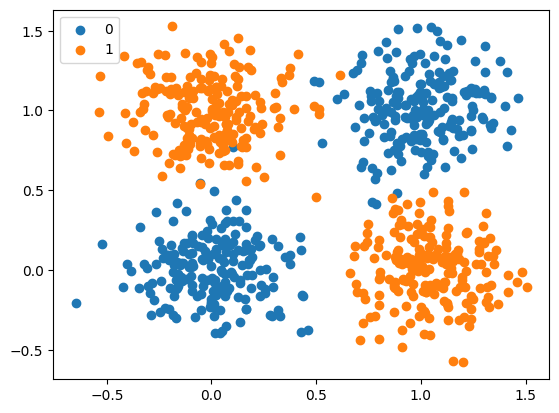

In [19]:
X, y = create_xor_dataset(num_samples_per_class=200, noise=0.2)

x0 = X[y == 0, :]
x1 = X[y == 1, :]

print(X.shape, y.shape)

plt.figure()
plt.scatter(x0[:, 0], x0[:, 1], label="0")
plt.scatter(x1[:, 0], x1[:, 1], label="1")
plt.legend()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(640, 2) (160, 2) (640,) (160,)
(array([0., 1.]), array([313, 327], dtype=int64))
(array([0., 1.]), array([87, 73], dtype=int64))


In [15]:
def tf_model(in_size, out_size, activation=False):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(in_size),
        tf.keras.layers.Dense(32),
        tf.keras.layers.ReLU() if activation else tf.keras.layers.Lambda(lambda x: x),
        tf.keras.layers.Dense(out_size)
    ])

    return model

In [16]:
model_linear = tf_model(2, 2, activation=False)
model_linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                96        
                                                                 
 lambda (Lambda)             (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_nonlinear = tf_model(2, 2, activation=True)
model_nonlinear.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                96        
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


#### Compile models

In [25]:
model_linear.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

model_nonlinear.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

#### Train Models

In [26]:
model_linear.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))
print("\n")
model_nonlinear.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
5/5 [==============================] - 1s 51ms/step - loss: 0.7044 - accuracy: 0.4234 - val_loss: 0.6966 - val_accuracy: 0.4125
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6955 - accuracy: 0.4031 - val_loss: 0.7051 - val_accuracy: 0.4563
Epoch 3/10
5/5 [==============================] - 0s 18ms/step - loss: 0.6995 - accuracy: 0.5094 - val_loss: 0.7014 - val_accuracy: 0.4563
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 0.6975 - accuracy: 0.3875 - val_loss: 0.6962 - val_accuracy: 0.3500
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.6968 - accuracy: 0.3656 - val_loss: 0.6990 - val_accuracy: 0.4563
Epoch 6/10
5/5 [==============================] - 0s 19ms/step - loss: 0.6934 - accuracy: 0.5063 - val_loss: 0.7021 - val_accuracy: 0.4563
Epoch 7/10
5/5 [==============================] - 0s 18ms/step - loss: 0.6948 - accuracy: 0.5109 - val_loss: 0.6977 - val_accuracy: 0.4500
Epoch 8/10
5/5 [===========

### CIFAR-10 classification <a class="anchor" id="cifar10"></a>

In [234]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [235]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [236]:
np.unique(x_train[0])

array([  0,   4,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

We need to pre-process these `np.ndarrays` to be represented by vectors and to have normalized pixel values.

In [237]:
def pre_process_img(images, resize_dim=None):
    
    mx_images = np.max(images)
    if mx_images > 1:
        images = images / 255.0
    
    if resize_dim is not None and (images.shape[-3] != resize_dim or images.shape[-2] != resize_dim):
        resizer = tf.keras.layers.Resizing(resize_dim, resize_dim)
        images = resizer(images)
    
    return images

In [238]:
x_train = pre_process_img(x_train, resize_dim=16)
x_test = pre_process_img(x_test, resize_dim=16)

In [239]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 16, 16, 3) (50000, 1)
(10000, 16, 16, 3) (10000, 1)


In [240]:
def generic_fcnn(input_size, output_size, hidden_sizes=[], activation_fn=tf.nn.relu, input_flatten=True):
    model = tf.keras.Sequential()

    print(input_size)
    if input_flatten:
        model.add(tf.keras.layers.Flatten(input_shape=input_size))
    else:
        model.add(tf.keras.layers.Input(shape=(input_size,)))

    for hidden_size in hidden_sizes:
        model.add(tf.keras.layers.Dense(hidden_size, activation=activation_fn))
    
    model.add(tf.keras.layers.Dense(output_size))

    return model

In [248]:
input_size = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
output_size = 10
batch_size = 256
hidden_sizes = [256, 128, 64]

In [249]:
model = generic_fcnn(input_size, output_size, hidden_sizes=hidden_sizes, input_flatten=True)
model.summary()

(16, 16, 3)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 768)               0         
                                                                 
 dense_44 (Dense)            (None, 256)               196864    
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)            (None, 10)                650       
                                                                 
Total params: 238,666
Trainable params: 238,666
Non-trainable params: 0
_________________________________________________________________


Create `tf.data.Dataset`

In [250]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [251]:
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [252]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

`Callbacks` are used to define special functions to be executed at given stages during training. Below, we'll create a callback that'll activate after each validation step, and save the model if the validation loss has decreased. This will be passed to `model.fit(..., callbacks=[...], ...)`.

In [256]:
save_callback = tf.keras.callbacks.ModelCheckpoint(
    "./models/cifar10_tf/model.hdf5",
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    save_freq='epoch',
)

In [257]:
model.fit(train_dataset, epochs=20, validation_data=test_dataset, callbacks=[save_callback])

Epoch 1/20
196/196 [==============================] - ETA: 0s - loss: 1.2858 - accuracy: 0.5438
Epoch 00001: val_loss improved from inf to 1.40327, saving model to ./models/cifar10_tf\model.hdf5
196/196 [==============================] - 2s 9ms/step - loss: 1.2858 - accuracy: 0.5438 - val_loss: 1.4033 - val_accuracy: 0.5092
Epoch 2/20
188/196 [===========================>..] - ETA: 0s - loss: 1.2698 - accuracy: 0.5501
Epoch 00002: val_loss did not improve from 1.40327
196/196 [==============================] - 1s 7ms/step - loss: 1.2677 - accuracy: 0.5510 - val_loss: 1.4034 - val_accuracy: 0.5130
Epoch 3/20
192/196 [============================>.] - ETA: 0s - loss: 1.2584 - accuracy: 0.5534
Epoch 00003: val_loss improved from 1.40327 to 1.39278, saving model to ./models/cifar10_tf\model.hdf5
196/196 [==============================] - 2s 9ms/step - loss: 1.2571 - accuracy: 0.5543 - val_loss: 1.3928 - val_accuracy: 0.5117
Epoch 4/20
189/196 [===========================>..] - ETA: 0s - lo